# Churn Prediction: is the process of identifying customers who are likely to stop using a product or service in the near future.
### Group 3: Pov Phearum, Van Chanveasna, Bun Sreykeo, Phuong Karuna, Ear Chhaykhun, Mao Narith

### Data Description
* customerID: Customer ID
* genderCustomer: gender (female, male)
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* PartnerWhether: the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* numAdminTickets: The number of Admin Ticket
* numTechTickets: The number of Tech Ticket
* Churn: Whether the customer churned or not (Yes or No)


In [63]:
import pandas as pd
import numpy as np

df = pd.read_excel('Telecom Churn Rate Dataset.xlsx')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [64]:
df.shape

(7043, 23)

In [65]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

## 1. EDA:  Exploratory Data Analysis

In [66]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Data Preprocessing

In [68]:
# Check Missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [69]:
# Check Duplicates
df.duplicated().sum()

0

In [70]:
# Drop ananymous rows
df=df.drop(df.index[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]])
df['TotalCharges']=df['TotalCharges'].astype(float)

In [71]:
# Drop customerID column
df = df.drop('customerID', axis=1)

In [72]:
# Select numberical columns
numberical_col = df.select_dtypes(include = ['float64', 'int64'])
numberical_col.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
0,0,1,29.85,29.85,0,0
1,0,34,56.95,1889.50,0,0
2,0,2,53.85,108.15,0,0
3,0,45,42.30,1840.75,0,3
4,0,2,70.70,151.65,0,0


In [73]:
# Select categorical columns
categorical_col = df.select_dtypes(include = ['object', 'category'])
categorical_col = categorical_col.drop('Churn', axis=1)
categorical_col.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [74]:
categorical_col.shape

(7032, 15)

## 3. Data Visualization

C:\Users\Phearum\AppData\Local\Temp\ipykernel_22352\4011179154.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])


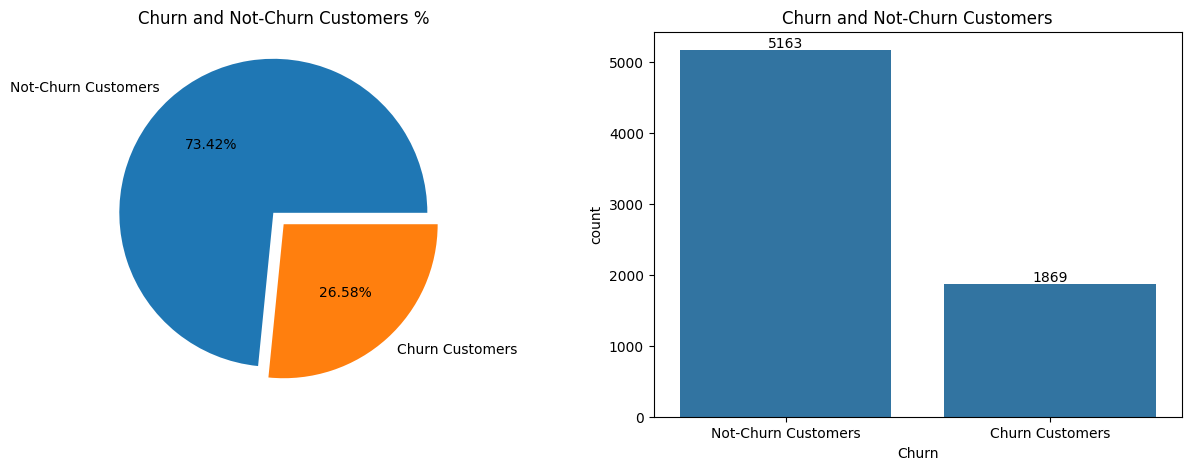

In [75]:
# Pie chart and bar chart for Churn
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(),labels = ['Not-Churn Customers','Churn Customers'], 
        autopct = '%1.2f%%',
        explode = (0.1,0))
plt.title('Churn and Not-Churn Customers %')

plt.subplot(1,2,2)
ax = sns.countplot(data = df, 
                   x='Churn',)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Churn and Not-Churn Customers')
plt.show()

### 3.1 Distribution of Numerical Feature

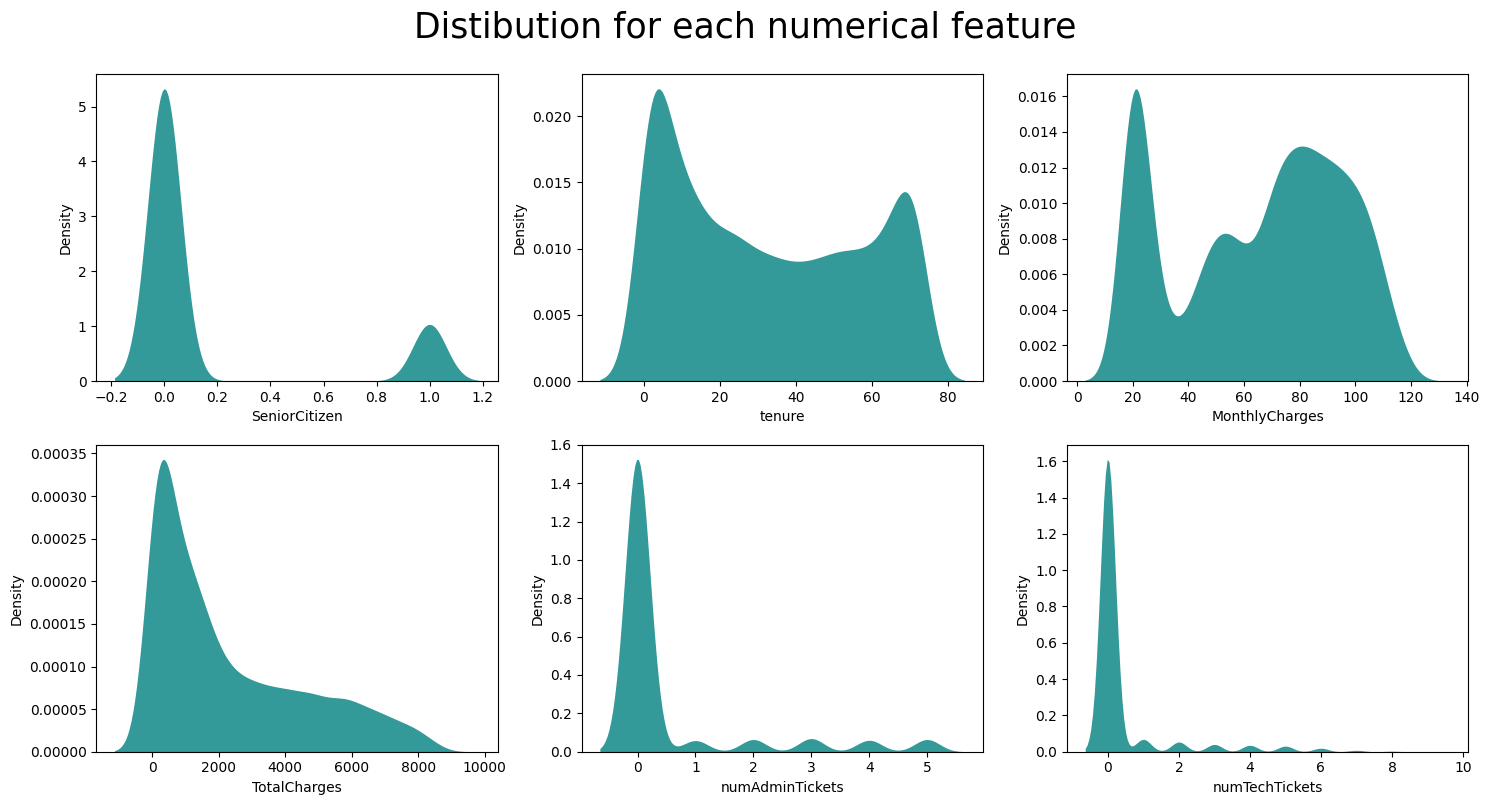

In [76]:
# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(15,8))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i]

dist_custom(dataset=df, columns_list=numberical_col, rows=2, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout()

### 3.2 Distribution of Numerical Feature with Churn

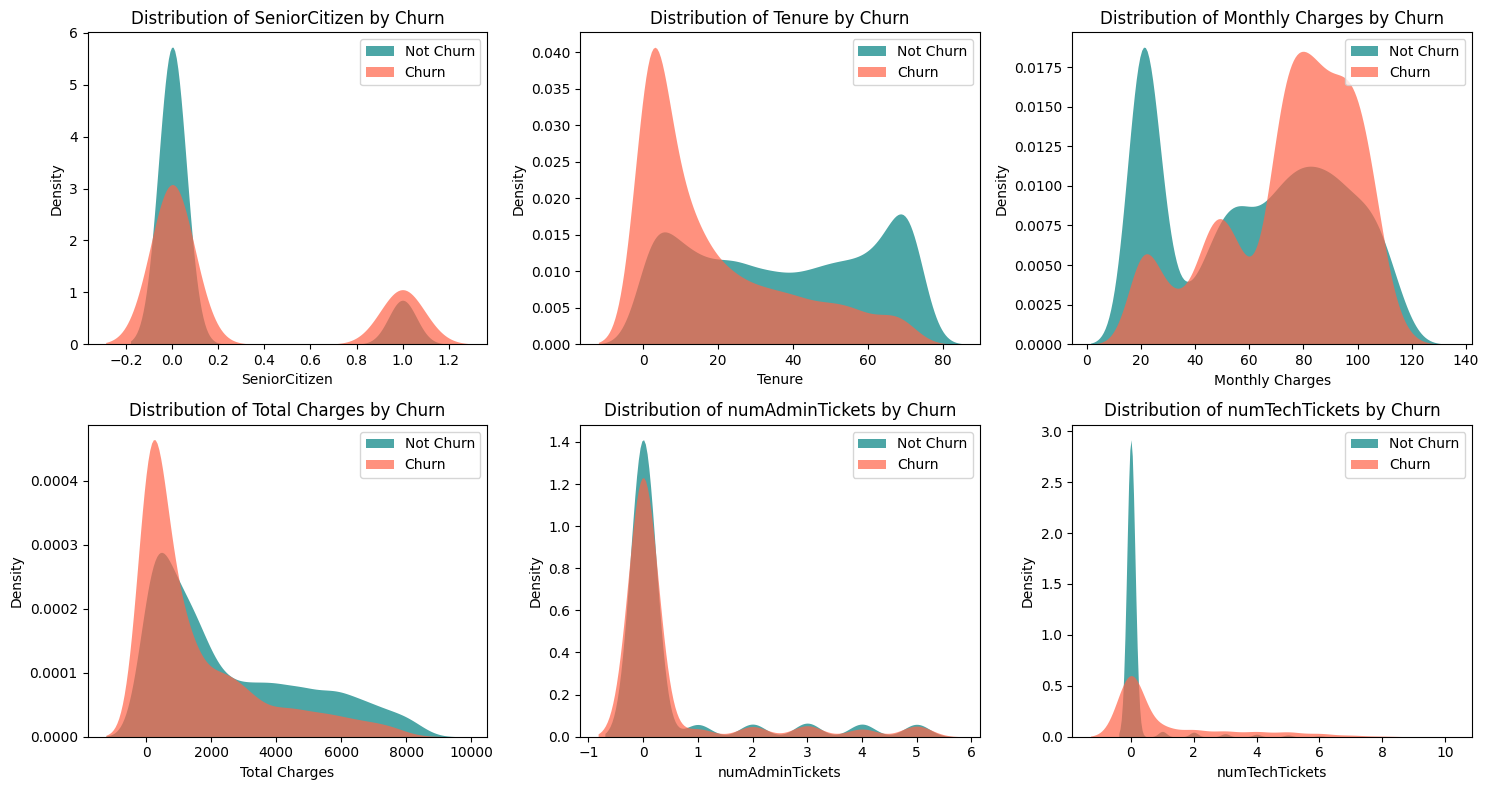

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plot 1: SeniorCitizen by Churn
ax = axes[0, 0]
sns.kdeplot(df.SeniorCitizen[(df["Churn"] == "No")], color='#008080', fill=True, alpha=.7, linewidth=0, ax=ax)
sns.kdeplot(df.SeniorCitizen[(df["Churn"] == "Yes")], color='#FF6347', fill=True, alpha=.7, linewidth=0, ax=ax)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('SeniorCitizen')
ax.set_title('Distribution of SeniorCitizen by Churn')

# Plot 2: Tenure by Churn
ax = axes[0, 1]
sns.kdeplot(df.tenure[(df["Churn"] == "No")], color='#008080', fill=True, alpha=.7, linewidth=0, ax=ax)
sns.kdeplot(df.tenure[(df["Churn"] == "Yes")], color='#FF6347', fill=True, alpha=.7, linewidth=0, ax=ax)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Tenure by Churn')

# Plot 3: Monthly Charges by Churn
ax = axes[0, 2]
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "No")], color='#008080', fill=True, alpha=.7, linewidth=0, ax=ax)
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "Yes")], color='#FF6347', fill=True, alpha=.7, linewidth=0, ax=ax)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

# Plot 4: Total Charges by Churn
ax = axes[1, 0]
sns.kdeplot(df.TotalCharges[(df["Churn"] == "No")], color='#008080', fill=True, alpha=.7, linewidth=0, ax=ax)
sns.kdeplot(df.TotalCharges[(df["Churn"] == "Yes")], color='#FF6347', fill=True, alpha=.7, linewidth=0, ax=ax)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')

# Plot 5: numAdminTicket by Churn
ax = axes[1, 1]
sns.kdeplot(df.numAdminTickets[(df["Churn"] == "No")], color='#008080', fill=True, alpha=.7, linewidth=0, ax=ax)
sns.kdeplot(df.numAdminTickets[(df["Churn"] == "Yes")], color='#FF6347', fill=True, alpha=.7, linewidth=0, ax=ax)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('numAdminTickets')
ax.set_title('Distribution of numAdminTickets by Churn')

# Plot 6: numTechTicket by Churn
ax = axes[1, 2]
sns.kdeplot(df.numTechTickets[(df["Churn"] == "No")], color='#008080', fill=True, alpha=.7, linewidth=0, ax=ax)
sns.kdeplot(df.numTechTickets[(df["Churn"] == "Yes")], color='#FF6347', fill=True, alpha=.7, linewidth=0, ax=ax)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('numTechTickets')
ax.set_title('Distribution of numTechTickets by Churn')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure with all subplots
plt.show()


### 3.3 Bar graph of Categorical Feature with Churn

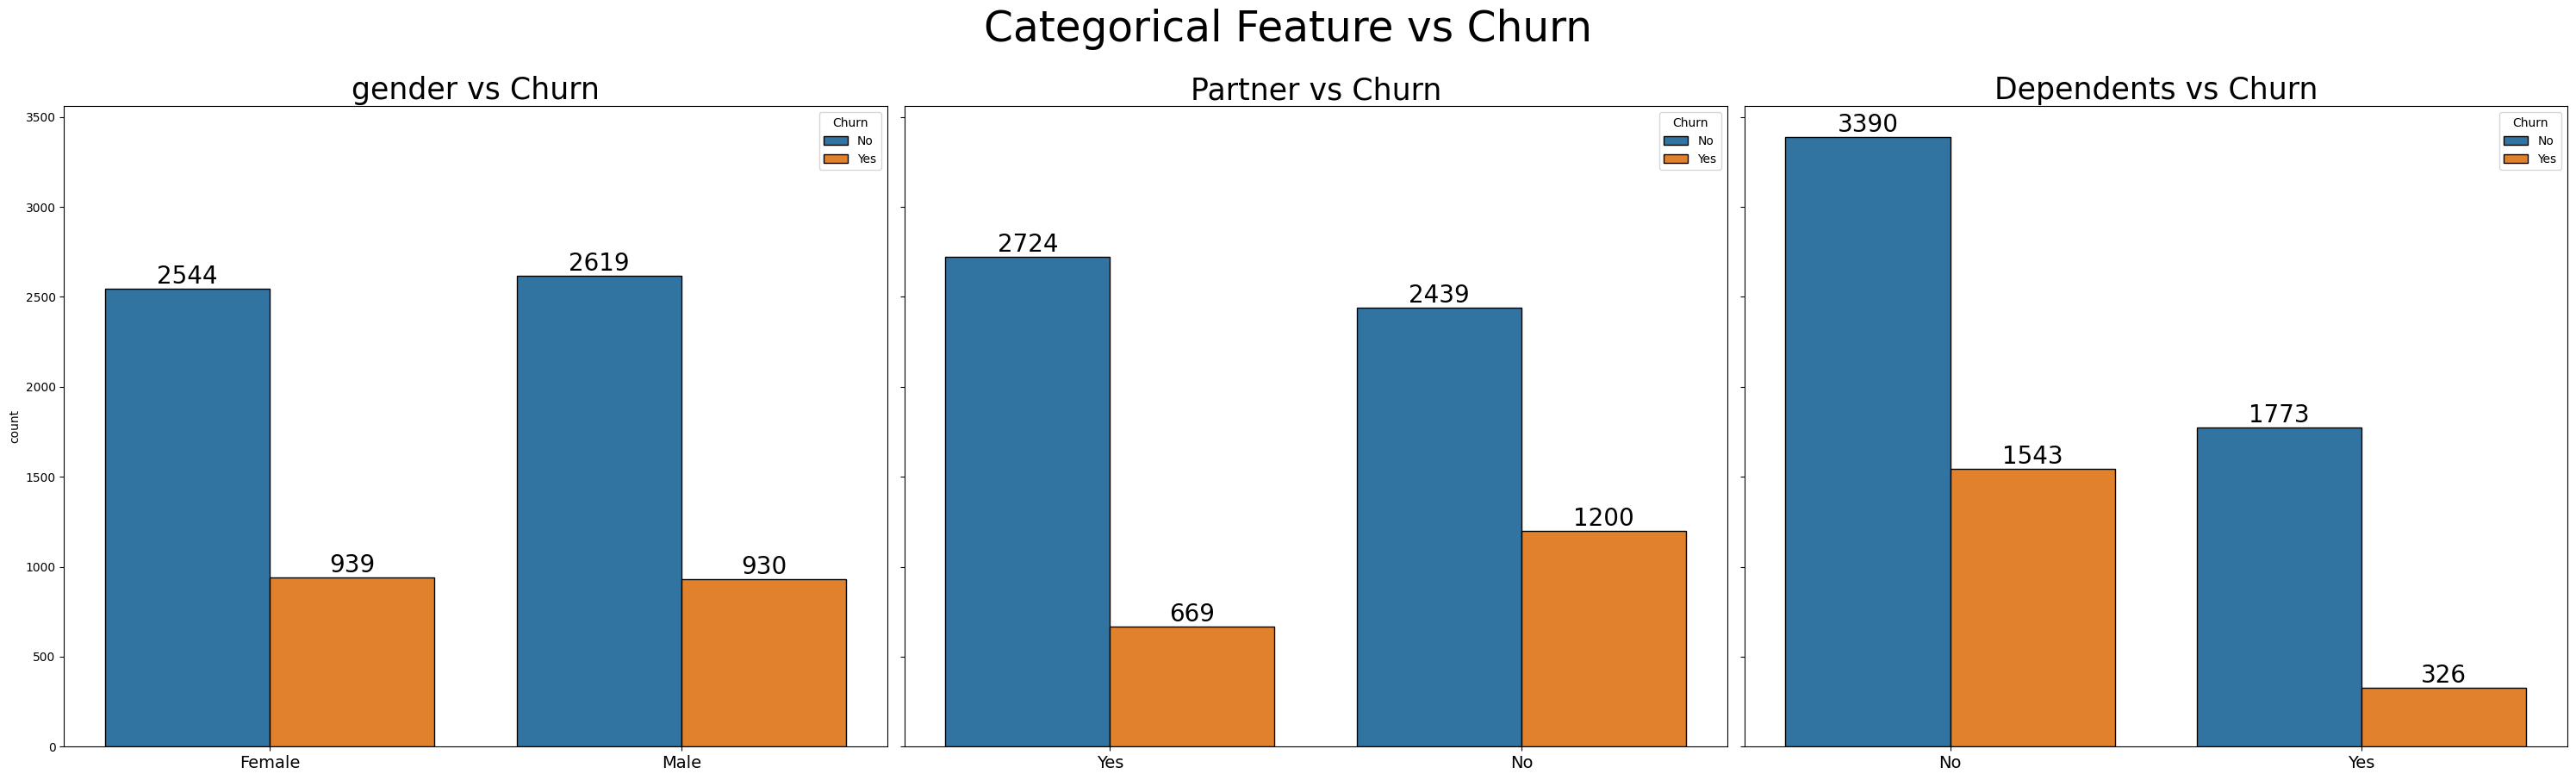

In [78]:
list1 = ['gender','Partner','Dependents']
hue = "Churn"
figsize = (30,9)

# defining function for countplots
def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle,y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, edgecolor = 'black')
        axs[i].set_title(data + f' vs {hue}', size=25)
        for i in ax.containers:
            ax.bar_label(i,size=20)
            ax.set_xlabel('')
            ax.tick_params(axis='x', labelsize=14)
        
countplots_custom(dataset=df, columns_list=list1, rows=1, cols=3, figsize=figsize, hue = hue, suptitle='Categorical Feature vs Churn')
plt.tight_layout()

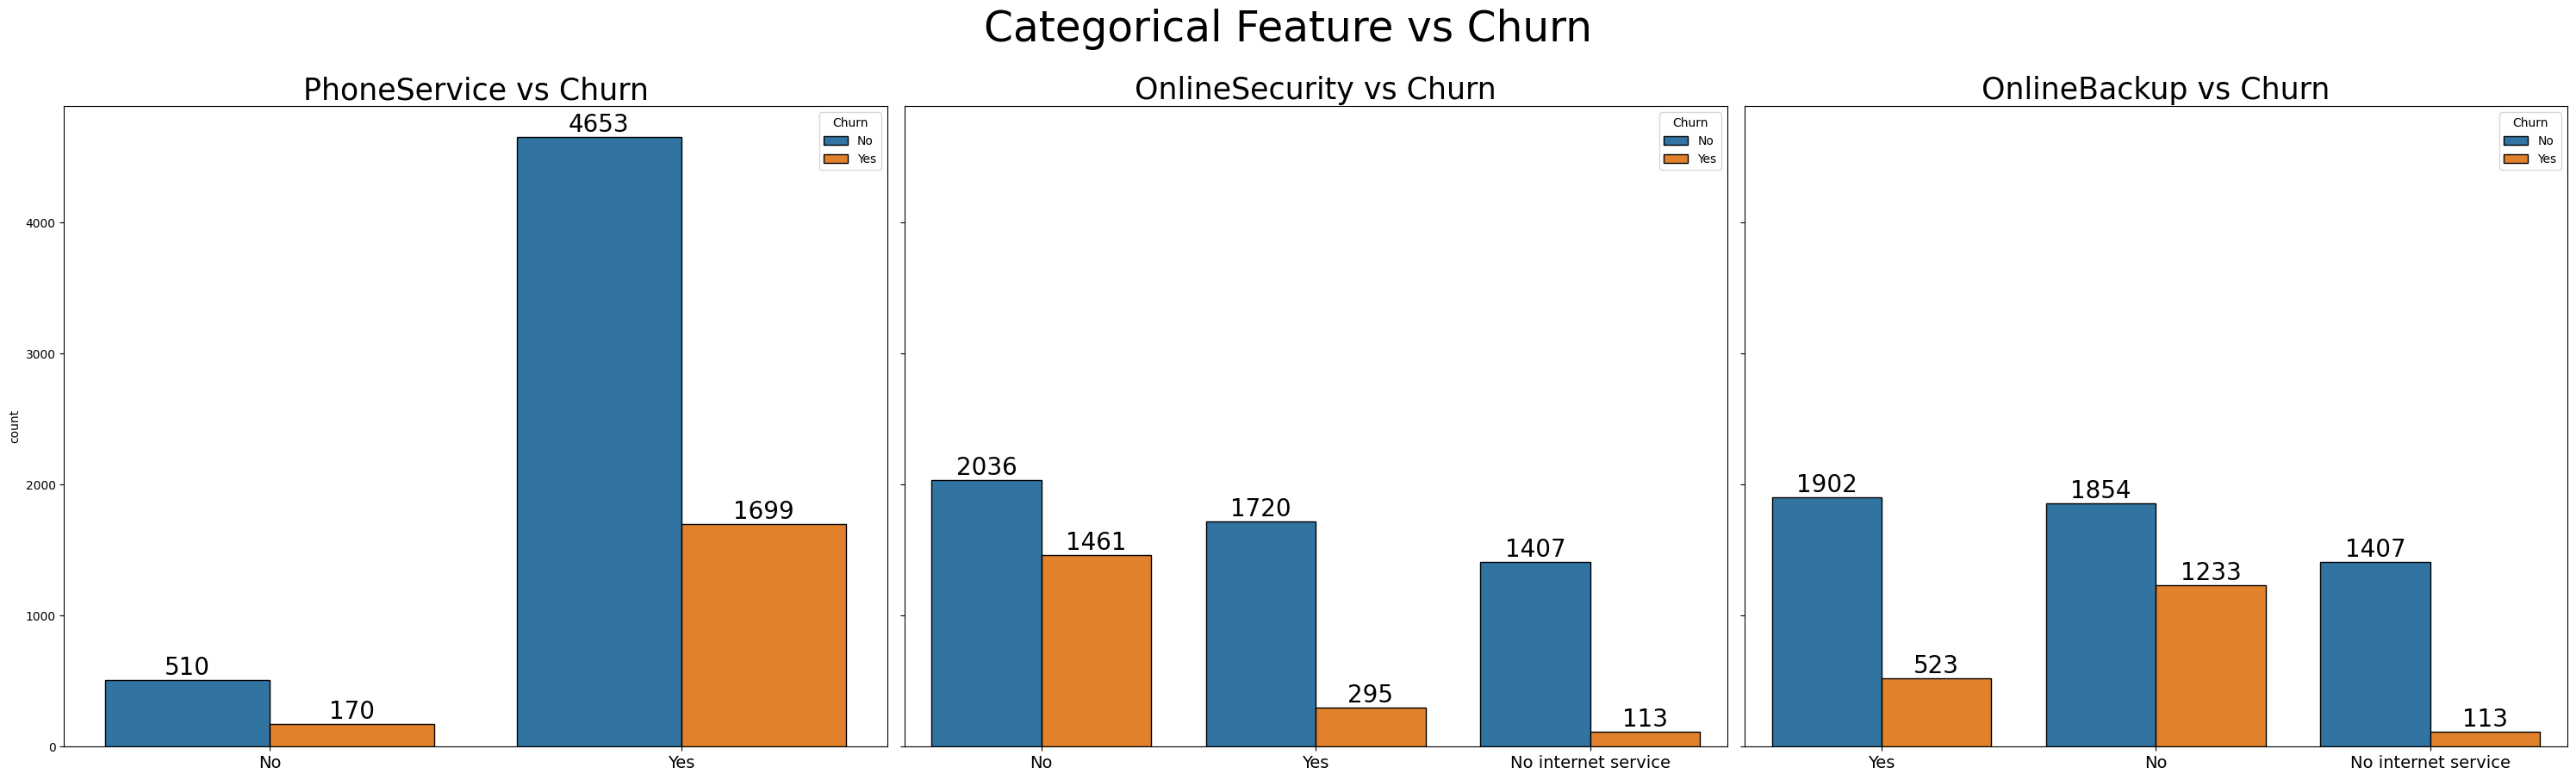

In [79]:
list1 = ['PhoneService','OnlineSecurity','OnlineBackup']
hue = "Churn"
figsize = (30,9)
        
countplots_custom(dataset=df, columns_list=list1, rows=1, cols=3, figsize=figsize, hue = hue, suptitle='Categorical Feature vs Churn')
plt.tight_layout()

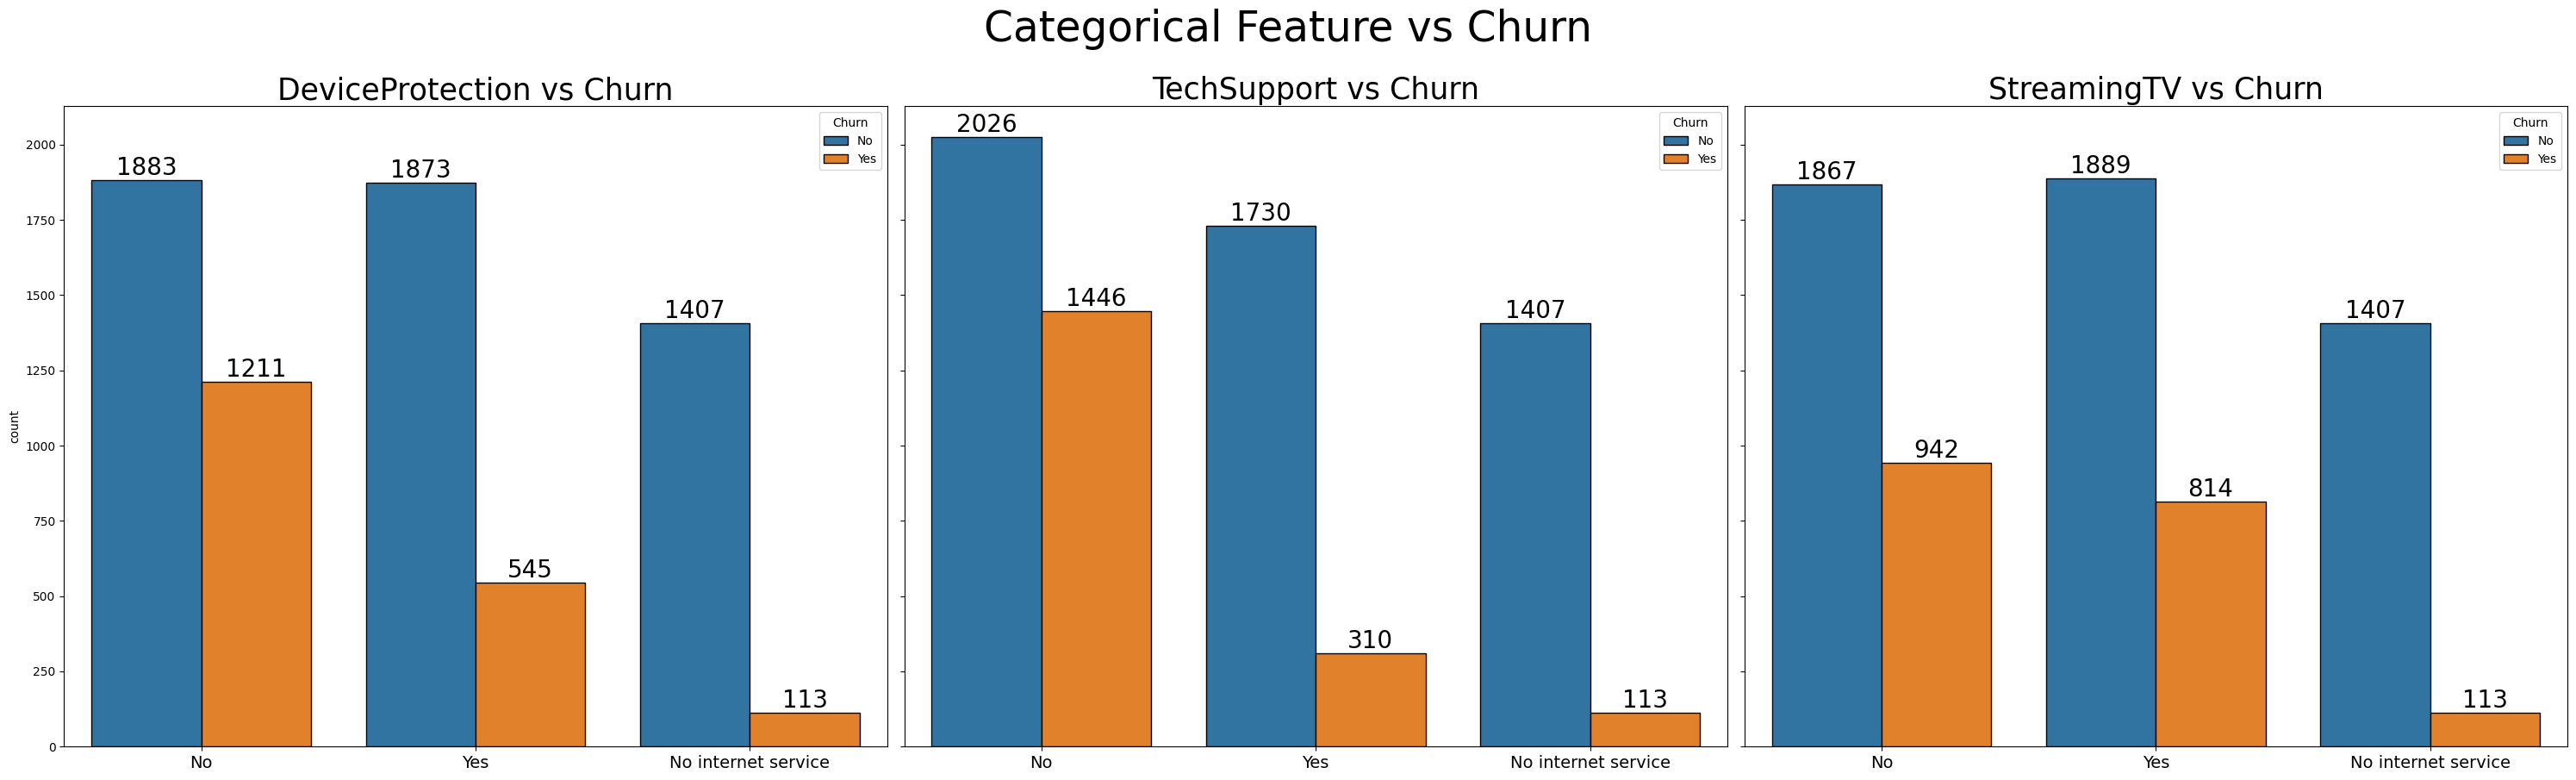

In [80]:
list1 = ['DeviceProtection','TechSupport','StreamingTV']
hue = "Churn"
figsize = (30,9)
        
countplots_custom(dataset=df, columns_list=list1, rows=1, cols=3, figsize=figsize, hue = hue, suptitle='Categorical Feature vs Churn')
plt.tight_layout()

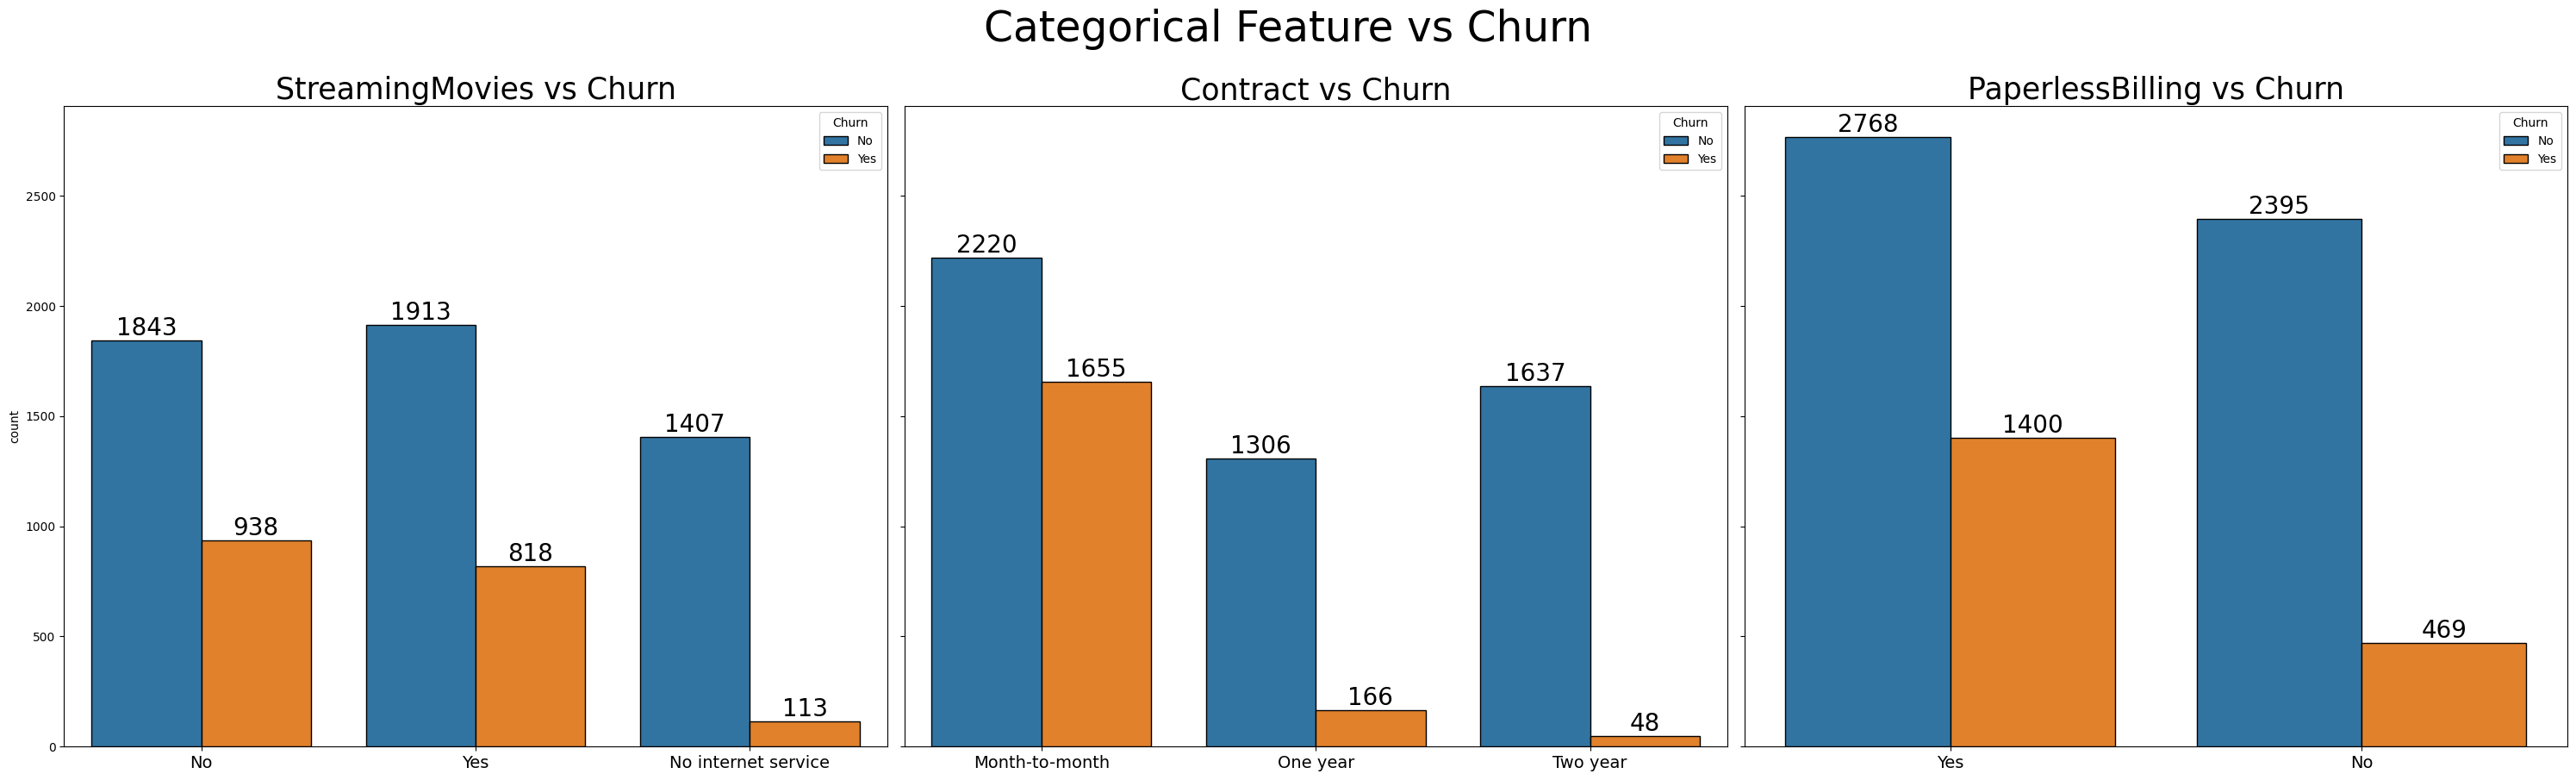

In [81]:
list1 = ['StreamingMovies','Contract','PaperlessBilling']
hue = "Churn"
figsize = (30,9)

countplots_custom(dataset=df, columns_list=list1, rows=1, cols=3, figsize=figsize, hue = hue, suptitle='Categorical Feature vs Churn')
plt.tight_layout()

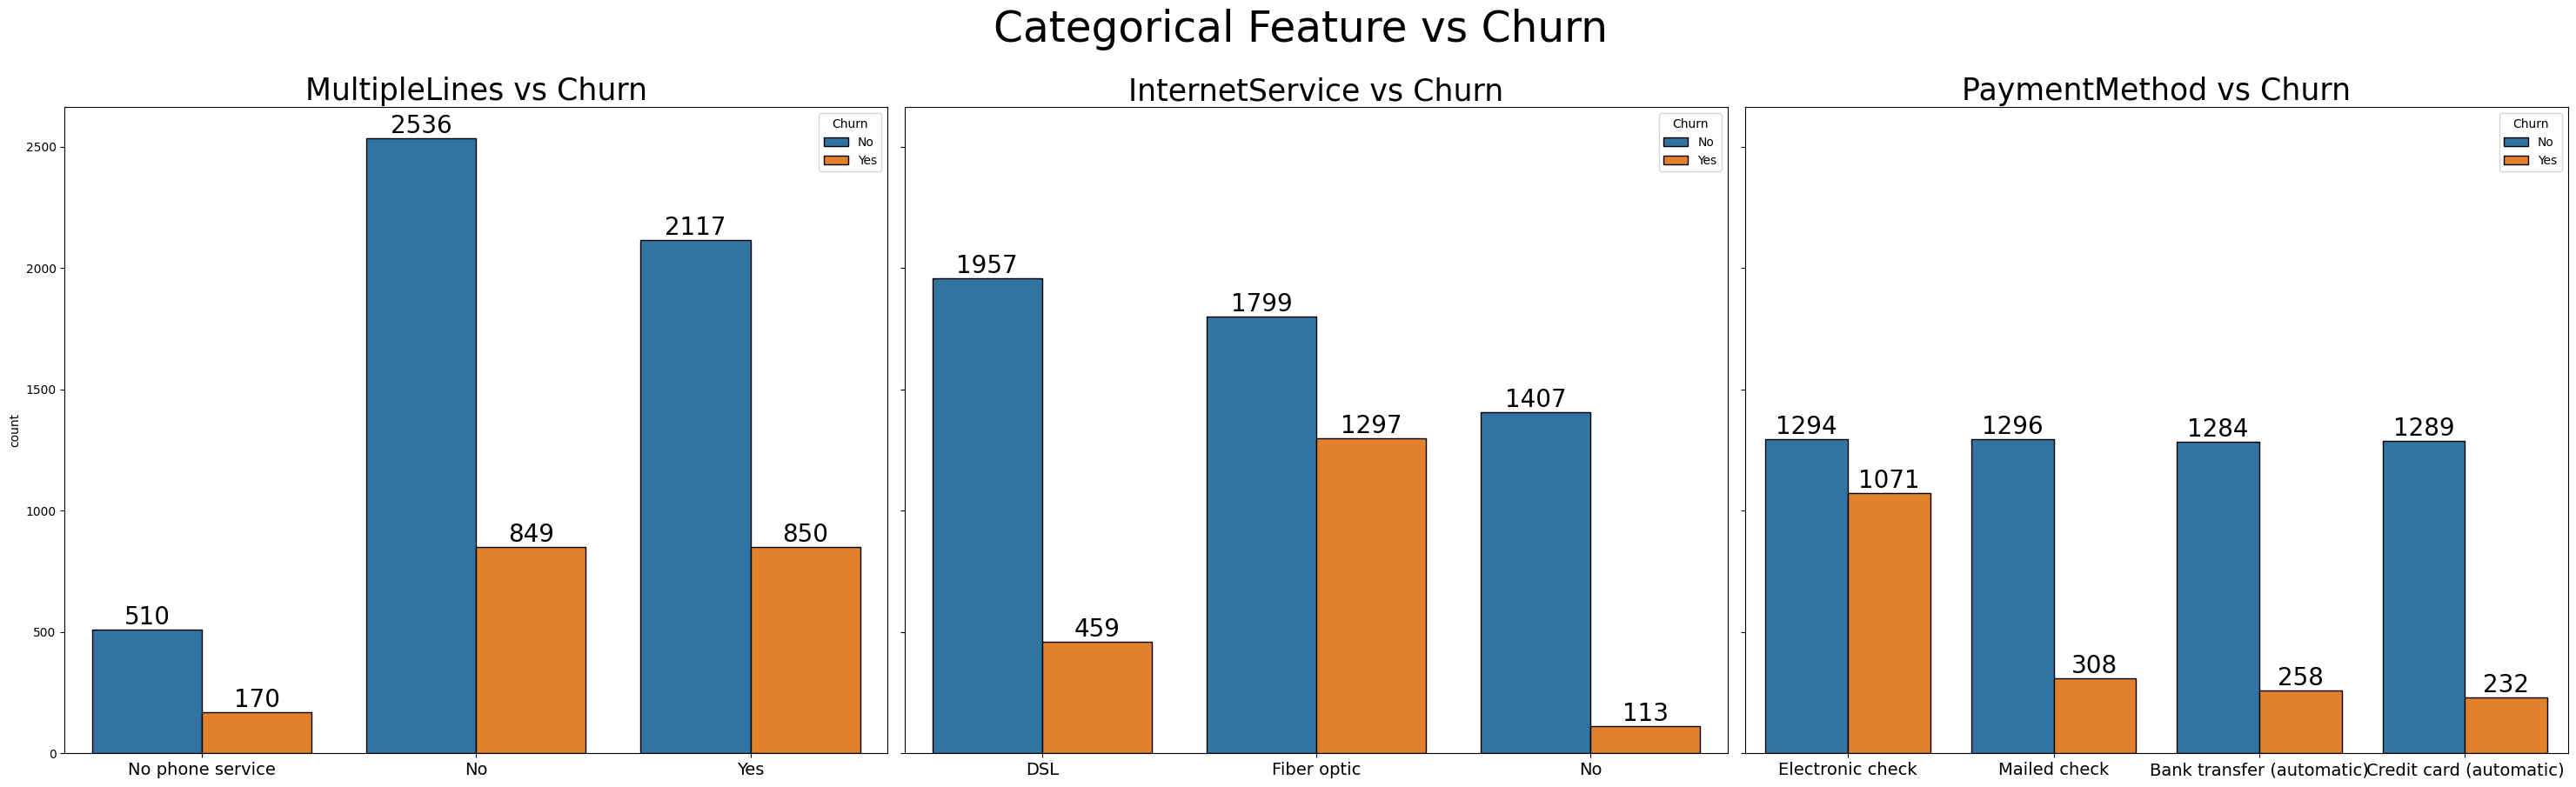

In [82]:
list1 = ['MultipleLines','InternetService','PaymentMethod']
hue = "Churn"
figsize = (30,9)

countplots_custom(dataset=df, columns_list=list1, rows=1, cols=3, figsize=figsize, hue = hue, suptitle='Categorical Feature vs Churn')
plt.tight_layout()

## 4. Ordinal Encoding (or Label Encoding)

In [83]:
# Ordinal Encoding for Churn column
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df['Churn'].unique()

array([0, 1], dtype=int64)

In [84]:
# Ordinal Encoding for the categorical columns
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df[categorical_col.columns] = ordinal_encoder.fit_transform(df[categorical_col.columns])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0,0,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0,0,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,1.0,3.0,53.85,108.15,0,0,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0,3,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,70.70,151.65,0,0,1


In [85]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets',
       'Churn'],
      dtype='object')

## 5. Correlation Matrix

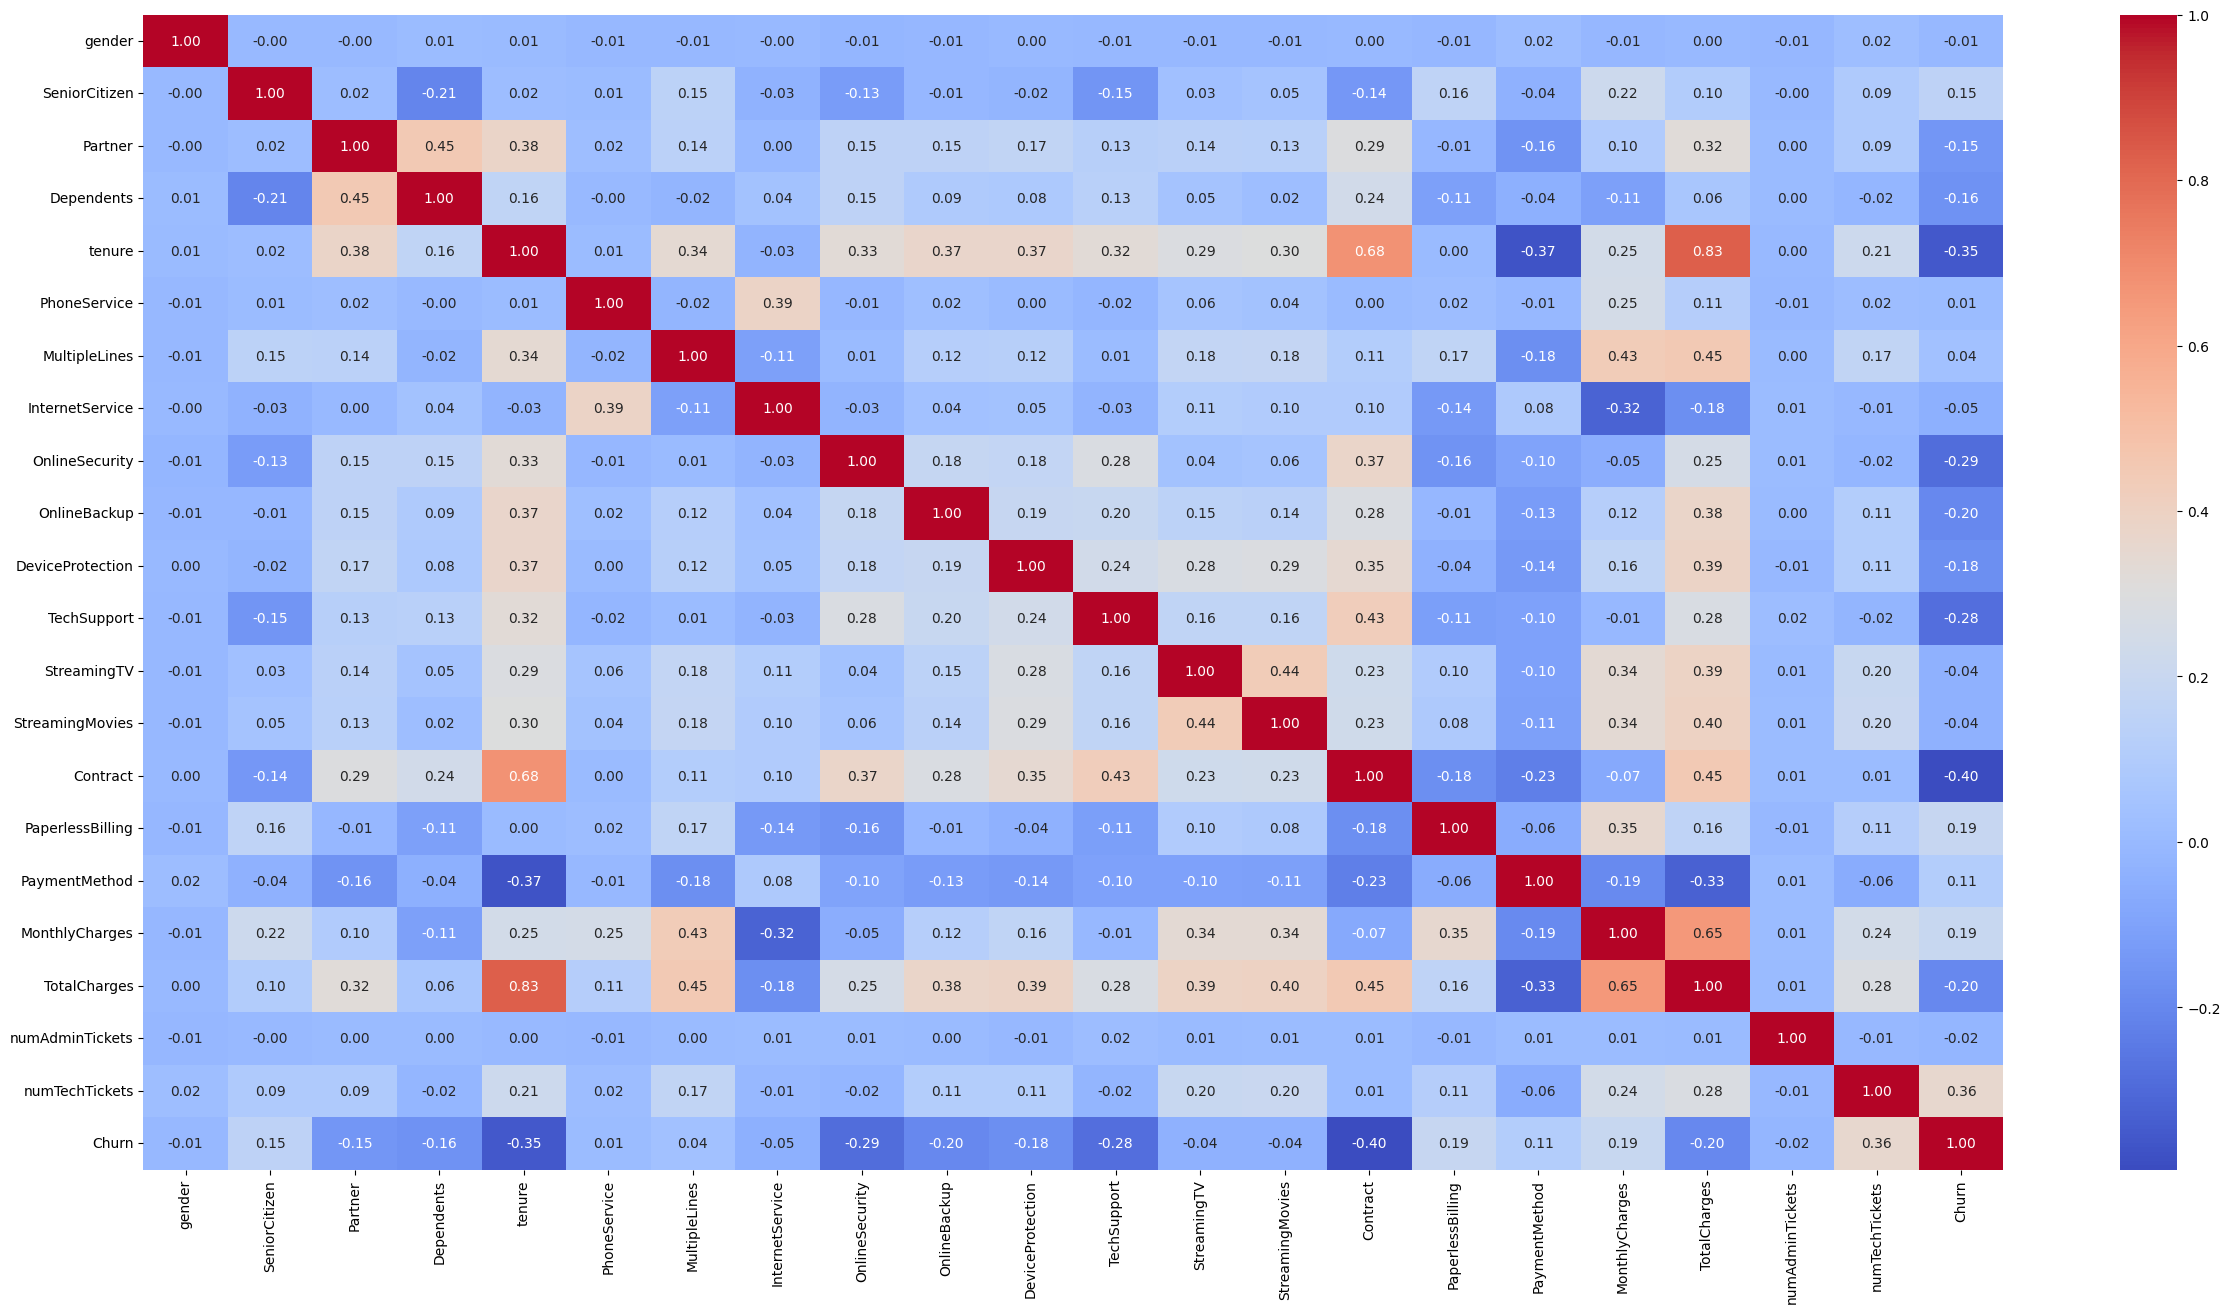

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## 6. Machine Learning Model

### 6.1 Split data
* 80% for training 
* 20% for testing

In [87]:
# Split the data into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((5625, 21), (1407, 21), (5625,), (1407,))

### 6.3 Random Forest Classification only

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest Classifier
model = RandomForestClassifier()

# Model training
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1033
           1       0.74      0.64      0.68       374

    accuracy                           0.84      1407
   macro avg       0.81      0.78      0.79      1407
weighted avg       0.84      0.84      0.84      1407



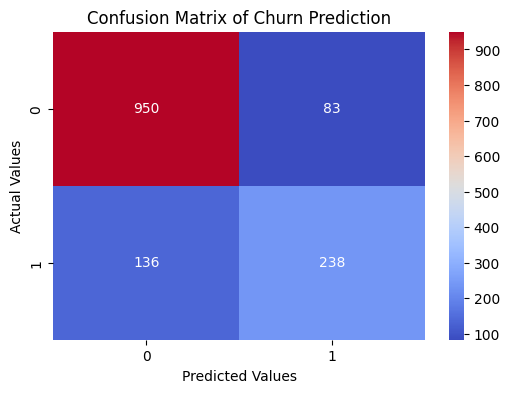

In [90]:
# Show graph of prediction and actual values
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix of Churn Prediction')
plt.show()

### 6.2 Ensemble Learning
Voting:
* Decision Tree Classification
* Random Forest Classification
* Gradient Booting Classification

In [91]:
# Voting Classifier: (Decision Tree, Random Forest, Gradient Boosting)
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Create the sub-models
estimators = []
model1 = DecisionTreeClassifier()
estimators.append(('decision_tree', model1))
model2 = RandomForestClassifier()
estimators.append(('random_forest', model2))
model3 = GradientBoostingClassifier()
estimators.append(('gradient_boosting', model3))

# Create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)

# Model evaluation
y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1033
           1       0.75      0.67      0.71       374

    accuracy                           0.85      1407
   macro avg       0.82      0.79      0.80      1407
weighted avg       0.85      0.85      0.85      1407



### Result by Confusion Matrix

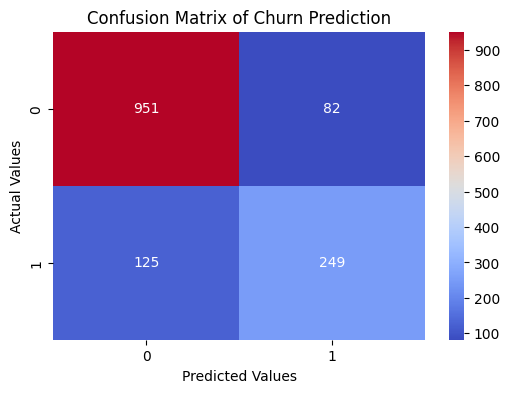

In [92]:
# Show graph of prediction and actual values
from sklearn.metrics import confusion_matrix
import seaborn as snsd
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix of Churn Prediction')
plt.show()

In [94]:
# make a prediction for creating a new customer
new_customer = pd.DataFrame({
    'gender': [1],
    'SeniorCitizen': [0],
    'Partner': [1],
    'Dependents': [0],
    'tenure': [2],
    'PhoneService': [1],
    'MultipleLines': [0],
    'InternetService': [1],
    'OnlineSecurity': [0],
    'OnlineBackup': [0],
    'DeviceProtection': [0],
    'TechSupport': [0],
    'StreamingTV': [0],
    'StreamingMovies': [0],
    'Contract': [0],
    'PaperlessBilling': [1],
    'PaymentMethod': [0],
    'MonthlyCharges': [12],
    'TotalCharges': [22],
    'numAdminTickets': [1],
    'numTechTickets': [2]
    })
# Make a prediction for creating a new customer
prediction = ensemble.predict(new_customer)
print(prediction)

[1]
